In [38]:
import pandas as pd
df=pd.read_csv("Loan_dataset_classification.csv")
#print(df.head())
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    str    
 1   Gender             957 non-null    str    
 2   Married            978 non-null    str    
 3   Dependents         956 non-null    str    
 4   Education          981 non-null    str    
 5   Self_Employed      926 non-null    str    
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    str    
 12  Loan_Status        614 non-null    str    
dtypes: float64(4), int64(1), str(8)
memory usage: 99.8 KB


In [39]:
df.isnull().sum()


Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

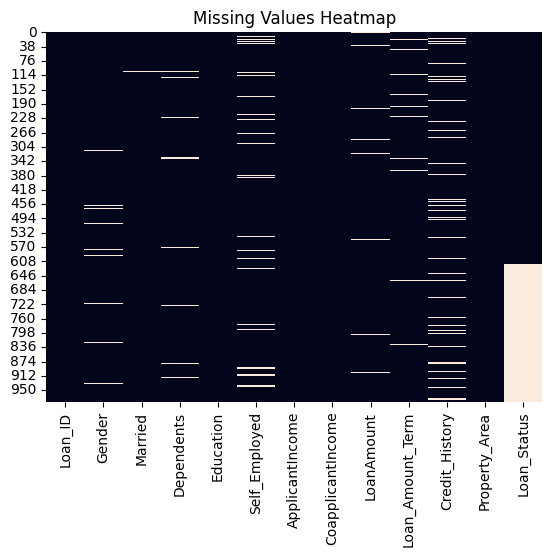

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [41]:
df["Married"].mode()
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])


<Axes: xlabel='Loan_Status'>

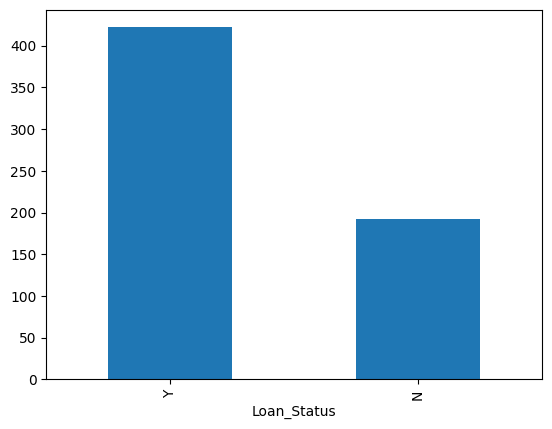

In [42]:
#target variable analysis
df['Loan_Status'].value_counts()
df['Loan_Status'].value_counts(normalize=True)*100
df['Loan_Status'].value_counts().plot.bar()

<Axes: >

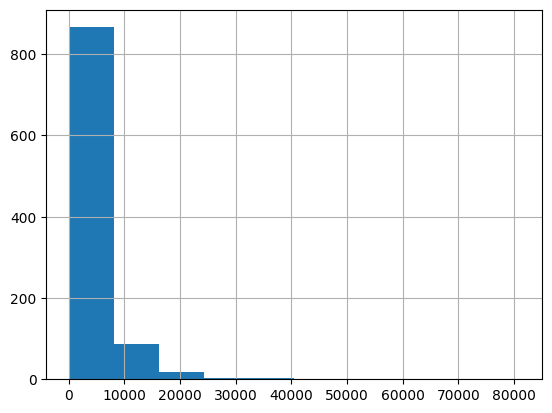

In [43]:
#univariate analysis(1 column at a time) -numerical

df['ApplicantIncome'].hist()

#categorical
#df['Gender'].value_counts().plot.bar()

<Axes: >

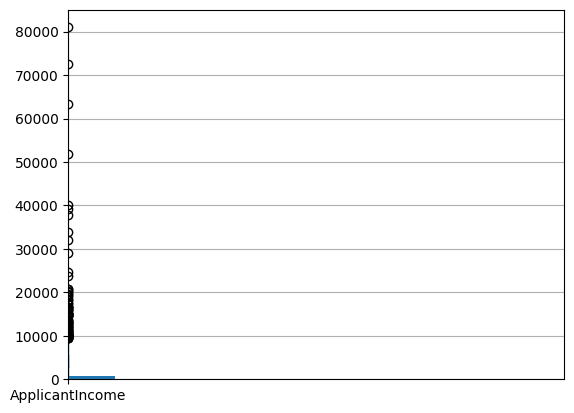

In [44]:
import numpy as np


df['ApplicantIncome'].hist()
df.boxplot(column='ApplicantIncome')

<Axes: >

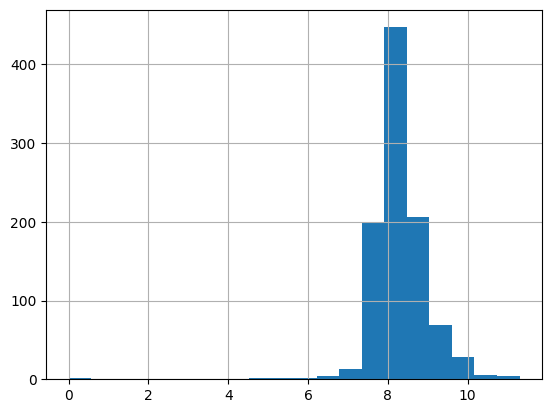

In [45]:
#it is right skewed -> log transform needed
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome']+1)
df['ApplicantIncome_log'].hist(bins=20)

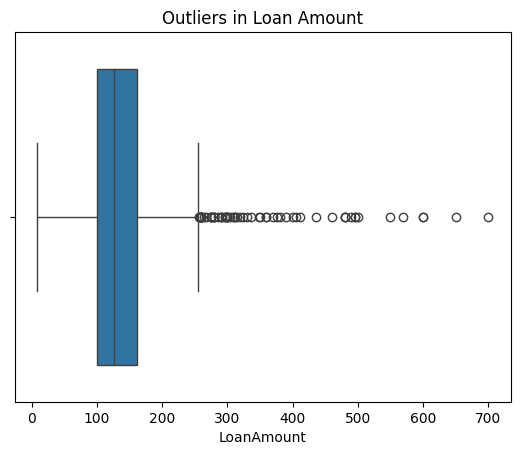

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["LoanAmount"])
plt.title("Outliers in Loan Amount")
plt.show()


In [ ]:
#Bivariate Analysis
pd.crosstab(df['Married'],df['Loan_Status'])

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


Loan_Status              N    Y
Credit_History Married         
0.0            No       29    3
               Yes      53    4
1.0            No       45  122
               Yes      52  256


<Axes: xlabel='Credit_History,Married'>

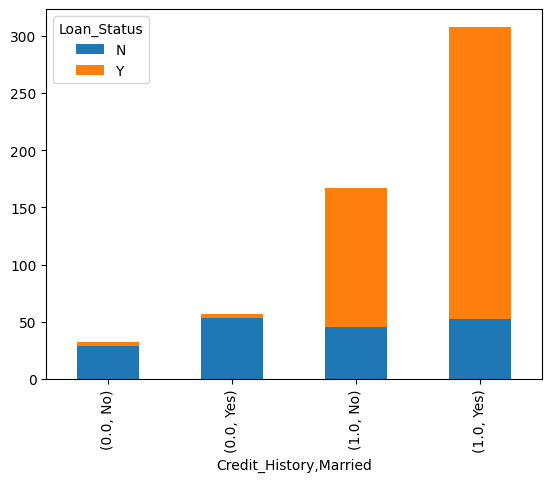

In [48]:
#crosstab with multiple columns
ct = pd.crosstab([df['Credit_History'], df['Married']], df['Loan_Status'])
print(ct)
#plot stacked bar chart
ct.plot(kind='bar', stacked=True)

In [50]:
df['Dependents'] = df['Dependents'].replace('3+', '3')

 

In [51]:
print(df)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
976  LP002971   Male     Yes          3  Not Graduate           Yes   
977  LP002975   Male     Yes          0      Graduate            No   
978  LP002980   Male      No          0      Graduate            No   
979  LP002986   Male     Yes          0      Graduate            No   
980  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1

In [52]:
num_cols = [
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term'
]
 
cat_cols = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'Credit_History',
    'Property_Area'
]

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
 
# Fill categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

C:\Users\negovin\AppData\Local\Temp\ipykernel_30424\4147424551.py:19: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col].fillna(df[col].median(), inplace=True)
C:\Users\negovin\AppData\Local\Temp\ipykernel_30424\4147424551.py:19: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assign

Loan_ID                  0
Gender                  24
Married                  0
Dependents              25
Education                0
Self_Employed           55
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              27
Loan_Amount_Term        20
Credit_History          79
Property_Area            0
Loan_Status            367
ApplicantIncome_log      0
Dependentsr             25
dtype: int64

In [53]:
import numpy as np
df.replace([' ', ''], np.nan, inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,Dependentsr
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,8.674197,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430327,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006701,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.857094,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699681,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,8.296547,3
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,8.333030,0
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,8.086718,0
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,8.517393,0


In [54]:
num_cols = [
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term',
    'Credit_History'   # numeric (0/1)
]

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\negovin\AppData\Local\Temp\ipykernel_30424\1112827556.py:10: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col].fillna(df[col].median(), inplace=True)
C:\Users\negovin\AppData\Local\Temp\ipykernel_30424\1112827556.py:10: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assign

In [55]:
cat_cols = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'Property_Area',
    'Dependentsr'
]

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\negovin\AppData\Local\Temp\ipykernel_30424\1580415849.py:12: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col].fillna(df[col].mode()[0], inplace=True)


In [56]:
df.isnull().sum()


Loan_ID                  0
Gender                  24
Married                  0
Dependents              25
Education                0
Self_Employed           55
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              27
Loan_Amount_Term        20
Credit_History          79
Property_Area            0
Loan_Status            367
ApplicantIncome_log      0
Dependentsr             25
dtype: int64

In [57]:
num_cols = [
    'LoanAmount',
    'Loan_Amount_Term',
    'Credit_History'
]

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [58]:
cat_cols = [
    'Gender',
    'Dependents',
    'Self_Employed',
    'Dependentsr'
]

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [59]:
df.isnull().sum()


Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status            367
ApplicantIncome_log      0
Dependentsr              0
dtype: int64

In [60]:
print(df)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
976  LP002971   Male     Yes          3  Not Graduate           Yes   
977  LP002975   Male     Yes          0      Graduate            No   
978  LP002980   Male      No          0      Graduate            No   
979  LP002986   Male     Yes          0      Graduate            No   
980  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       126.0             360.0   
1

In [61]:
# Features (all columns except target)
print(df["Married"].unique())
df["Married"]=df["Married"].fillna(df["Married"].mode())
df["Married"] = df["Married"].map({"No": 0, "Yes": 1})
print(df["Married"].unique())


print(df["Self_Employed"].unique())
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].map({"No": 0, "Yes": 1})
print(df["Self_Employed"].unique())

print(df["Education"].unique())
df["Education"]=df["Education"].fillna(df["Education"].mode())
df["Education"] = df["Education"].map({"Not Graduate": 0, "Graduate": 1})
print(df["Education"].unique())

print(df["Property_Area"].unique())
df["Property_Area"]=df["Property_Area"].fillna(df["Property_Area"].mode())
df["Property_Area"] = df["Property_Area"].map({"Urban": 0, "Rural": 1,"Semiurban":2 })
print(df["Property_Area"].unique())

<StringArray>
['No', 'Yes']
Length: 2, dtype: str
[0 1]
<StringArray>
['No', 'Yes']
Length: 2, dtype: str
[0 1]
<StringArray>
['Graduate', 'Not Graduate']
Length: 2, dtype: str
[1 0]
<StringArray>
['Urban', 'Rural', 'Semiurban']
Length: 3, dtype: str
[0 1 2]


In [62]:
print(df)

      Loan_ID Gender  Married Dependents  Education  Self_Employed  \
0    LP001002   Male        0          0          1              0   
1    LP001003   Male        1          1          1              0   
2    LP001005   Male        1          0          1              1   
3    LP001006   Male        1          0          0              0   
4    LP001008   Male        0          0          1              0   
..        ...    ...      ...        ...        ...            ...   
976  LP002971   Male        1          3          0              1   
977  LP002975   Male        1          0          1              0   
978  LP002980   Male        0          0          1              0   
979  LP002986   Male        1          0          1              0   
980  LP002989   Male        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       126.0             360.0   
1            

In [63]:
train_df=df[df["Loan_Status"].notna()]
test_df= df[df["Loan_Status"].isna()]
